# Data Wrangling and EDA

Queens is the largest borough of New York City. It contains the two NYC airports and is considered an "outer borough". The purpose of this notebook is to do data wrangling on a dataset containing geojson and shp files of truck routes in Queens, convert the data to a network representation, finally do exploratory data analysis on this network. Nodes will be intersections of routes and are labeled by coordinates.

https://data.cityofnewyork.us/Transportation/New-York-City-Truck-Routes/jjja-shxy/about_data

In [1]:
#pip install --force-reinstall -v "NumPy==1.26.4" --user

In [2]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#networkx graph computing library
import networkx as nx
import osmnx as ox
import nxviz as nv
import geopandas as gp
import scipy.stats as stats

import shapely as sh

In [3]:
truckgeo = gp.read_file("New York City Truck Routes_20240606.geojson")

<AxesSubplot:>

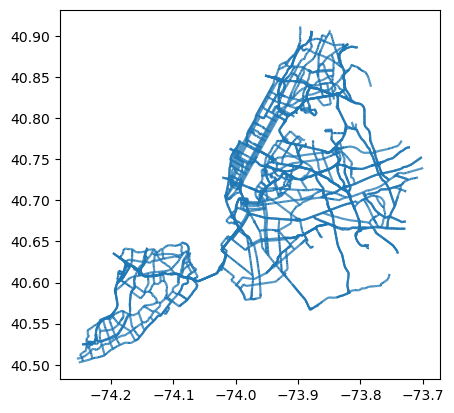

In [4]:
truckgeo.plot()

We restrict to truck routes just in Queens. The website www.mapshaper.org was used to easily convert geojson and shp files, as networkx works easily with shp, but the metadata in the geojson may be useful.

In [5]:
queensdf = truckgeo[truckgeo['boroname']=='Queens']

In [6]:
queensdf

truckroute coun_dist thrutunl objectid_1 thrubrg ltdlocal streetcode  \
17561          Y      28.0     None    17562.0    None     None     462890   
17562          Y      29.0     None    17563.0    None     None     411855   
17563          Y      20.0     None    17564.0    None     None     452390   
17564          Y      27.0     None    17565.0    None     None     449690   
17565          Y      27.0     None    17566.0    None     None     457190   
...          ...       ...      ...        ...     ...      ...        ...   
32934          Y      31.0     None        0.0    None     None     464760   
32935          Y      31.0     None        0.0    None     None     464760   
32936          Y      31.0     None        0.0    None     None     464760   
32937          Y      31.0     None        0.0    None     None     464760   
32938          Y      31.0     None        0.0    None     None     464760   

      localbrg borocd restrictio  ... boroname thruexwy routetype localtunl  \
17561     None  410.0       None  ...   Queens     None   Through      None   
17562     None  409.0       None  ...   Queens     None   Through      None   
17563     None  407.0       None  ...   Queens     None     Local      None   
17564     None  412.0       None  ...   Queens     None   Through      None   
17565     None  412.0       None  ...   Queens     None     Local      None   
...        ...    ...        ...  ...      ...      ...       ...       ...   
32934     None  413.0       None  ...   Queens     None   Through      None   
32935     None  413.0       None  ...   Queens     None   Through      None   
32936     None  413.0       None  ...   Queens     None   Through      None   
32937     None  413.0       None  ...   Queens     None   Through      None   
32938     None  413.0       None  ...   Queens     None   Through      None   

      borocode                        street segmentid  \
17561      4.0          SOUTH CONDUIT AVENUE   0054957   
17562      4.0  VAN WYCK EXPWY SB EN MAIN ST   0132494   
17563      4.0             KISSENA BOULEVARD   0091299   
17564      4.0               HILLSIDE AVENUE   0060907   
17565      4.0        GUY R BREWER BOULEVARD   0059237   
...        ...                           ...       ...   
32934      4.0               SUNRISE HIGHWAY   0171670   
32935      4.0               SUNRISE HIGHWAY   0171670   
32936      4.0               SUNRISE HIGHWAY   0063527   
32937      4.0               SUNRISE HIGHWAY   0064060   
32938      4.0               SUNRISE HIGHWAY   0106765   

                                         nyc_reg cong_dist  \
17561  NYCDOT Traffic Rules, Section 4-13-(b)(1)       5.0   
17562  NYCDOT Traffic Rules, Section 4-13-(b)(1)       6.0   
17563  NYCDOT Traffic Rules, Section 4-13-(b)(2)       6.0   
17564  NYCDOT Traffic Rules, Section 4-13-(b)(1)       5.0   
17565  NYCDOT Traffic Rules, Section 4-13-(b)(2)       5.0   
...                                          ...       ...   
32934  NYCDOT Traffic Rules, Section 4-13-(b)(1)       5.0   
32935  NYCDOT Traffic Rules, Section 4-13-(b)(1)       5.0   
32936  NYCDOT Traffic Rules, Section 4-13-(b)(1)       5.0   
32937  NYCDOT Traffic Rules, Section 4-13-(b)(1)       5.0   
32938  NYCDOT Traffic Rules, Section 4-13-(b)(1)       5.0   

                                                geometry  
17561  MULTILINESTRING ((-73.81733 40.66489, -73.8167...  
17562  MULTILINESTRING ((-73.81939 40.70765, -73.8188...  
17563  MULTILINESTRING ((-73.82472 40.75549, -73.8239...  
17564  MULTILINESTRING ((-73.77800 40.71405, -73.7773...  
17565  MULTILINESTRING ((-73.78302 40.68428, -73.7826...  
...                                                  ...  
32934  MULTILINESTRING ((-73.74097 40.66580, -73.7412...  
32935  MULTILINESTRING ((-73.74097 40.66580, -73.7412...  
32936  MULTILINESTRING ((-73.74363 40.66583, -73.7444...  
32937  MULTILINESTRING ((-73.72984 40.66556, -73.7313...  
32938  MULTILINESTRING ((-73.

In [7]:
queensdf.isna().sum()

truckroute        0
coun_dist         0
thrutunl      10738
objectid_1        0
thrubrg       10645
ltdlocal      10784
streetcode        0
localbrg      10726
borocd            0
restrictio    10723
shape_leng        0
st_sen_dis        0
assem_dist        0
boroname          0
thruexwy       8885
routetype         0
localtunl     10784
borocode          0
street            0
segmentid         0
nyc_reg           0
cong_dist         0
geometry          0
dtype: int64

Much of the missing data pertains to bridges and tunnels. This so called "metadata" of the network may not be important.

<AxesSubplot:>

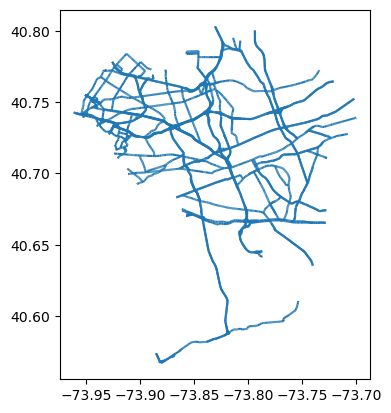

In [8]:
queensdf.plot()

After restricting the geopandas dataframe to just Queens, I converted to a shp file so that networkx could easily read it.
<code>queensdf.to_file('queenstest', driver="GeoJSON")</code>

In [9]:
truckshapeG = nx.read_shp("New York City Truck Routes_20240606\geo_export_eea34371-355a-42bd-935d-c7f299377428.shp")

In [10]:
#truckshapeG.nodes(data=True)

In [11]:
truckshapeQueensG = nx.read_shp("queenstest/queenstest.shp")

In [12]:
nx.info(truckshapeQueensG)

'DiGraph with 9821 nodes and 10738 edges'

In [13]:
#truckshapeQueensG.nodes()

First let us visualize node degrees in this network with a frequency historgram.

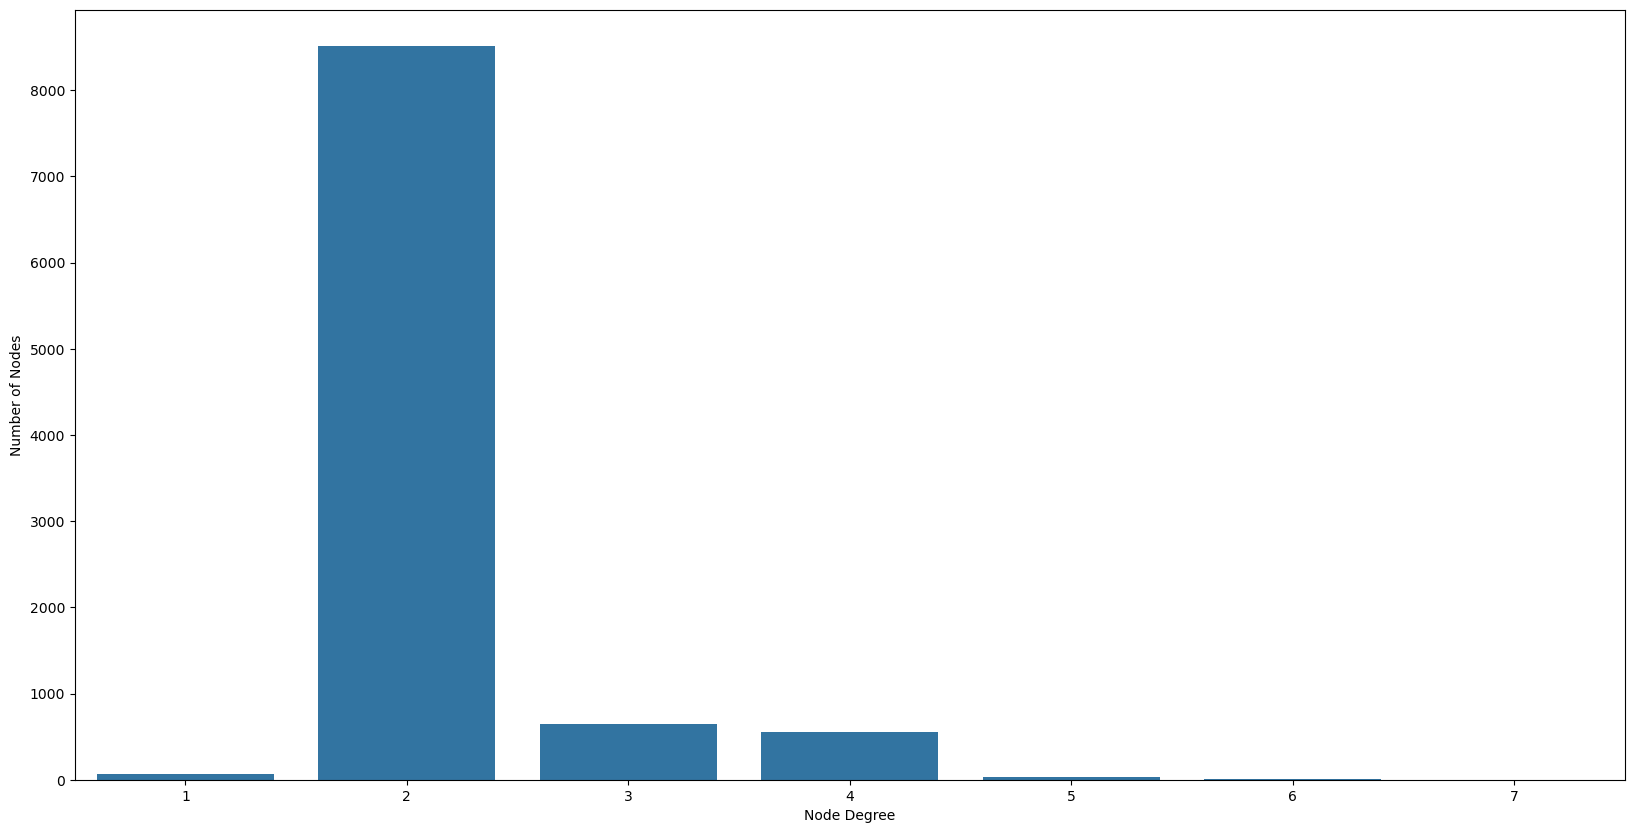

In [16]:
from collections import Counter
degrees = [val for (node, val) in truckshapeQueensG.degree()]
degree_dic = Counter(degrees)

degree_hist = pd.DataFrame({"degree": list(degree_dic.values()),
                            "Number of Nodes": list(degree_dic.keys())})
plt.figure(figsize=(20,10))
sns.barplot(y = 'degree', x = 'Number of Nodes', data = degree_hist)
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes')
plt.tick_params(axis='both')
plt.show()

The simple (undirected) graph looks the same.

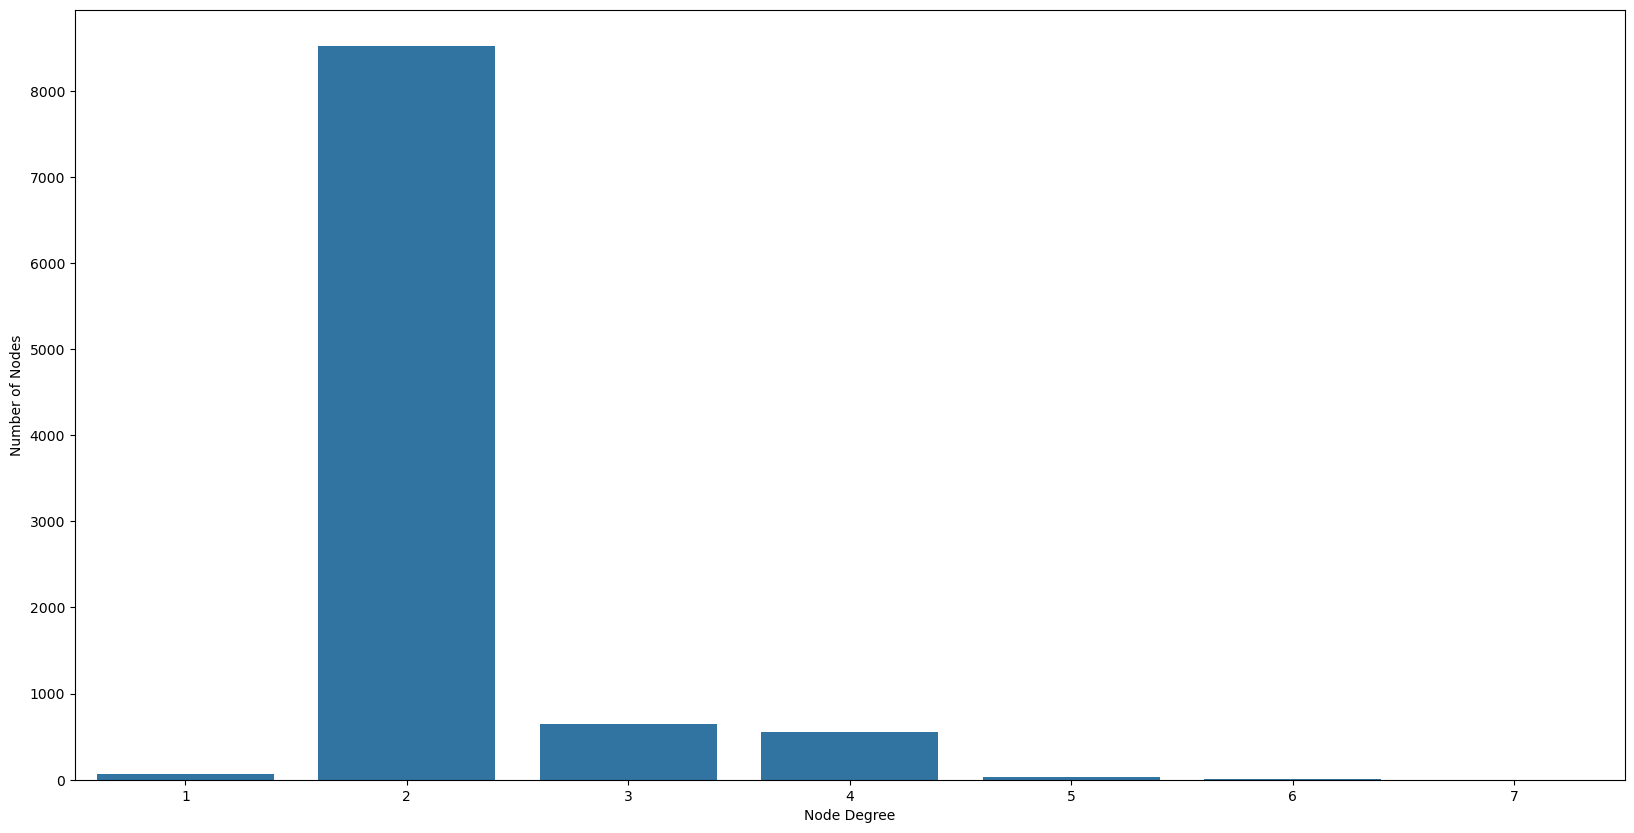

In [17]:
G = nx.Graph(truckshapeQueensG)
degrees = [val for (node, val) in G.degree()]
degree_dic = Counter(degrees)

degree_hist = pd.DataFrame({"degree": list(degree_dic.values()),
                            "Number of Nodes": list(degree_dic.keys())})
plt.figure(figsize=(20,10))
sns.barplot(y = 'degree', x = 'Number of Nodes', data = degree_hist)
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes')
plt.tick_params(axis='both')
plt.show()

Here is a plot of the incoming vs outgoing degree that is close to symmetric, but we have instances of 5 in-degree with 2 out degree on nodes.

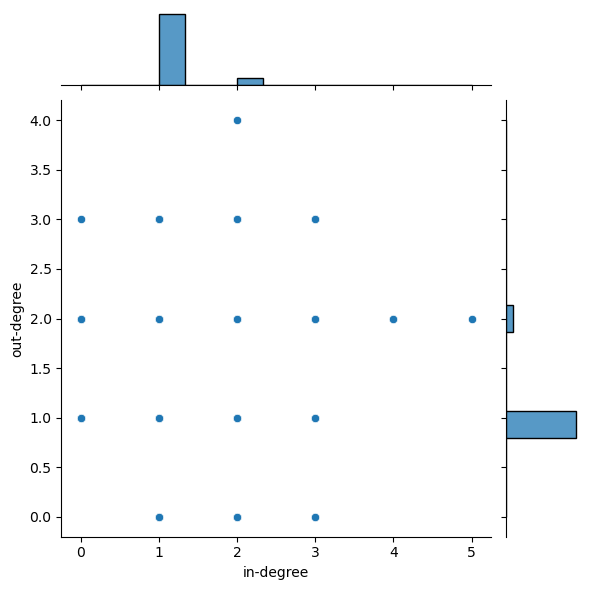

In [18]:
ins = [val for (node, val) in truckshapeQueensG.in_degree()]
outs = [val for (node, val) in truckshapeQueensG.out_degree()]
degrees = pd.DataFrame({"in-degree": ins, "out-degree": outs})

fig = sns.jointplot(x="in-degree",y="out-degree",data=degrees)

The slight difference between in and out degree as well as between directed and undirected may be due to the fact that trucks will not be driving in one-way streets.

As a sanity check, we will look at graph density and expect the number to be closer to 0, as a number closer to 1 is more like a complete graph (every node would be connected to every other node).

In [19]:
nx.density(truckshapeQueensG)

0.00011134127771011493

We have an issue in that the graph is actually not connected. There also aren't any isolated points. There are 2 connected components, so there are two parts of this borough that do not have connected truck lines. However, the second component only has 12 nodes. We shall think about whether or not to drop the second component. For now, we can do more analysis on the first main component, which has 9809 nodes.

In [20]:
list(nx.isolates(G))

[]

There are no isolated routes.

In [21]:
len(list(nx.connected_components(G)))

2

Below are the number of nodes in each connected component.

In [22]:
len(list(nx.connected_components(G))[0])

9809

In [23]:
len(list(nx.connected_components(G))[1])

12

Checking the out puts of <code>nx.write_shp(S[0],'component1')</code>, <code>nx.write_shp(S[1],'component2')</code> we see that the second component of this graph is just a short section on the Belt Parkway. The Belt Parkway is also included in the first component so we can effectively ignore the second component.

In [24]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [26]:
S[0]

In [27]:
nx.diameter(S[0])

427

In [28]:
nx.average_shortest_path_length(S[0])

143.63278511494505

Connectivity is the minimum number of elements (nodes or edges) that need to be removed to separate the remaining nodes into two or more isolated subgraphs. 'G' is already disconnected, so it makes sense that we get 0.

In [29]:
nx.node_connectivity(G)

0

In [30]:
nx.node_connectivity(S[0])

1

There is a very slight increase in density when focusing on the first coonnected component.

In [31]:
nx.density(S[0])

0.00022277041243043934

In [32]:
Gfull= nx.Graph(truckshapeG)
len(list(nx.connected_components(Gfull)))

2

In [33]:
[len(G.subgraph(c).copy()) for c in nx.connected_components(Gfull)]

[9809, 12]

In fact, the only unconnected part of the graph in the entire NYC network is actually in Queens.

In [34]:
len(Gfull)

29632

In [35]:
len(G)

9821

In [36]:
len(G)/len(Gfull)

0.3314322354211663

Although Queens is only 1 of 5 boroughs in NYC, it accounts for 1/3 of the truck route nodes. Recall it is also the largest borough in terms of area.

In [37]:
nx.info(truckshapeQueensG)

'DiGraph with 9821 nodes and 10738 edges'

In [38]:
nx.info(G)

'Graph with 9821 nodes and 10727 edges'

Average (in/out) degree is below.

In [39]:
(10727)/9821

1.0922512982384687

The graph below shows that this network is not scale-free, otherwise it would be a straight line. The degree distributions follow a Poisson Distribution which is typical for a random network.

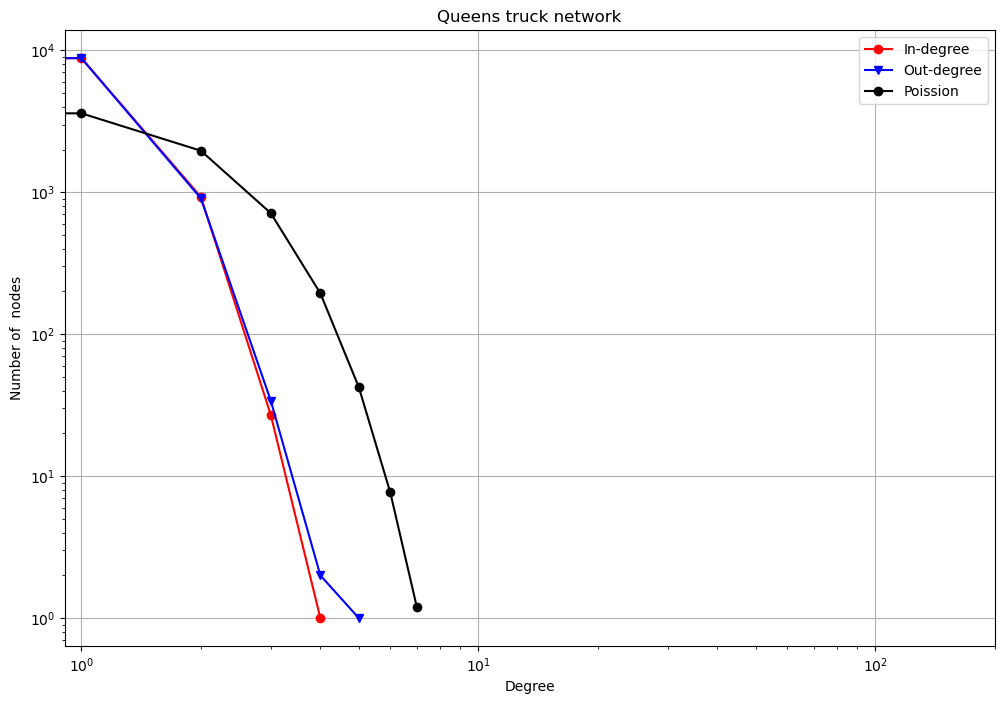

In [40]:
from collections import Counter
import collections
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

in_degrees  = truckshapeQueensG.in_degree() 
in_h = Counter(dict(in_degrees).values())
in_dic = collections.OrderedDict(sorted(in_h.items()))
in_hist = list(in_dic.values())
in_values =list(in_dic.keys())

out_degrees  = truckshapeQueensG.out_degree() 
out_h =  Counter(dict(out_degrees).values())
out_dic = collections.OrderedDict(sorted(out_h.items()))
out_hist = list(out_dic.values())
out_values =list(out_dic.keys())

mu = 1.09
sigma = np.sqrt(mu)
x = range(0,8)
prob = stats.poisson.pmf(x, mu)*9821

plt.figure(figsize=(12, 8)) 
plt.grid(True)
plt.loglog(out_values,out_hist,'ro-')  # out-degree
plt.loglog(in_values,in_hist,'bv-')  # in-degree
plt.plot(x, prob, "o-", color="black")
plt.legend(['In-degree','Out-degree','Poission'])
plt.xlabel('Degree')
plt.ylabel('Number of  nodes')
plt.title('Queens truck network')
plt.xlim([0,2*10**2])
plt.show()

In [41]:
nx.algebraic_connectivity(S[0])

4.611905242528632e-05

Betweenness centrality of a node is the sum of the fraction of all-pairs shortest paths that pass through that node. This can point us to intersections in these truck routes that go through the shortest paths in the networks. We can expect more traffic on nodes with more betweeness centrality. Since the algorithm takes a while, I will save the dictionary that it produces.

In [42]:
#between =  nx.betweenness_centrality(S[0])
#np.save('between.npy', between)
between = np.load('between.npy',allow_pickle='TRUE').item()

In [43]:
max_node, max_bc = max(between.items(), key=lambda x: x[1])
max_node, max_bc

((-73.81755020058212, 40.70400233334627), 0.19362540474348752)

In [44]:
between_dict = {max_node:max_bc for (max_node,max_bc) in between.items()}

In [45]:
between_dict = sorted(between_dict.items(), key=lambda x: x[1],reverse=True)

In [46]:
between_dict[0:10]

[((-73.81755020058212, 40.70400233334627), 0.19362540474348752),
 ((-73.83875129690054, 40.75699499138943), 0.16710674123597022),
 ((-73.86942458590576, 40.74915685117137), 0.14499278518313227),
 ((-73.84324381424442, 40.75533680302757), 0.1429155310605563),
 ((-73.862078726773, 40.712201060331516), 0.14077551069152905),
 ((-73.8587632499653, 40.75071697140801), 0.1399481766424255),
 ((-73.81399921636638, 40.69725557293256), 0.13952096352488977),
 ((-73.8170518473462, 40.7028769088471), 0.13934315436722222),
 ((-73.815399625322, 40.699769541978526), 0.1393005268209368),
 ((-73.81686030462477, 40.702444330628474), 0.13921327202629685)]

In [47]:
neighborhoods = gp.read_file("Neighborhoods Boundries.geojson")

In [48]:
neighborhoods

ntacode     shape_area                               ntaname  \
0      BK43  35799637.8103                               Midwood   
1      BK75  32629833.1149                               Bedford   
2      BX40  6307283.62202                         Fordham South   
3      BK88  54005019.2286                          Borough Park   
4      BK96  32706946.4035                  Rugby-Remsen Village   
..      ...            ...                                   ...   
190    BX63  19369542.2241                        West Concourse   
191    QN17  57828447.5721                          Forest Hills   
192    QN99   311684971.61              park-cemetery-etc-Queens   
193    QN03  43263751.4662  Springfield Gardens South-Brookville   
194    QN98  227761739.733                               Airport   

        shape_leng  boroname borocode countyfips  \
0    27996.5912736  Brooklyn        3        047   
1    29992.9191744  Brooklyn        3        047   
2    15878.2729212     Bronx        2        005   
3     39247.227722  Brooklyn        3        047   
4    30957.8533949  Brooklyn        3        047   
..             ...       ...      ...        ...   
190  28550.7003701     Bronx        2        005   
191  36183.6078275    Queens        4        081   
192   490146.60402    Queens        4        081   
193  45266.2678751    Queens        4        081   
194  134833.935261    Queens        4        081   

                                              geometry  
0    MULTIPOLYGON (((-73.94733 40.62917, -73.94687 ...  
1    MULTIPOLYGON (((-73.94193 40.70073, -73.94439 ...  
2    MULTIPOLYGON (((-73.89138 40.86170, -73.89106 ...  
3    MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
4    MULTIPOLYGON (((-73.90856 40.65210, -73.90945 ...  
..                                                 ...  
190  MULTIPOLYGON (((-73.91192 40.84326, -73.91194 ...  
191  MULTIPOLYGON (((-73.83103 40.71434, -73.83115 ...  
192  MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ...  
193  MULTIPOLYGON (((-73.75763 40.66645, -73.75756 ...  
194  MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...  

[195 rows x 8 columns]

In [49]:
neighborhoods_queens = neighborhoods[neighborhoods['boroname']=='Queens']

In [50]:
neighborhoods_queens = neighborhoods_queens.set_index('ntaname')['geometry']

In [51]:
neighborhoods_queens

ntaname
East Flushing                                            MULTIPOLYGON (((-73.79493 40.75780, -73.79475 ...
Woodhaven                                                MULTIPOLYGON (((-73.84914 40.69828, -73.84948 ...
Auburndale                                               MULTIPOLYGON (((-73.77574 40.74333, -73.77580 ...
Murray Hill                                              MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...
East Elmhurst                                            MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...
Cambria Heights                                          MULTIPOLYGON (((-73.72678 40.70306, -73.72673 ...
Elmhurst                                                 MULTIPOLYGON (((-73.86791 40.74493, -73.86788 ...
Glen Oaks-Floral Park-New Hyde Park                      MULTIPOLYGON (((-73.71050 40.72723, -73.71050 ...
Hammels-Arverne-Edgemere                                 MULTIPOLYGON (((-73.76810 40.59785, -73.76795 ...
Jackson Heights              

In [57]:
len(neighborhoods_queens)

58

In [52]:
from shapely.geometry import MultiLineString, MultiPolygon

Give each node in the original 'queensdf' truck route dataset its own neighborhood feature.

In [53]:
queens_n_df=queensdf[['geometry']].join(queensdf['geometry'].apply(lambda x: x.within(neighborhoods_queens)))

In [54]:
len(queens_n_df) == len(queensdf)

True

In [55]:
queens_n_df.loc[queens_n_df['Queensboro Hill']==True]

geometry  East Flushing  \
17585  MULTILINESTRING ((-73.82620 40.74656, -73.8260...          False   
17586  MULTILINESTRING ((-73.82599 40.74831, -73.8262...          False   
17695  MULTILINESTRING ((-73.81499 40.74079, -73.8150...          False   
17696  MULTILINESTRING ((-73.81493 40.74100, -73.8149...          False   
18025  MULTILINESTRING ((-73.82125 40.74084, -73.8210...          False   
...                                                  ...            ...   
26649  MULTILINESTRING ((-73.82779 40.74261, -73.8270...          False   
26655  MULTILINESTRING ((-73.82167 40.74108, -73.8212...          False   
26656  MULTILINESTRING ((-73.82104 40.74076, -73.8195...          False   
26657  MULTILINESTRING ((-73.83333 40.74334, -73.8349...          False   
26658  MULTILINESTRING ((-73.83493 40.74343, -73.8339...          False   

       Woodhaven  Auburndale  Murray Hill  East Elmhurst  Cambria Heights  \
17585      False       False        False          False            False   
17586      False       False        False          False            False   
17695      False       False        False          False            False   
17696      False       False        False          False            False   
18025      False       False        False          False            False   
...          ...         ...          ...            ...              ...   
26649      False       False        False          False            False   
26655      False       False        False          False            False   
26656      False       False        False          False            False   
26657      False       False        False          False            False   
26658      False       False        False          False            False   

       Elmhurst  Glen Oaks-Floral Park-New Hyde Park  \
17585     False                                False   
17586     False                                False   
17695     False                                False   
17696     False                                False   
18025     False                                False   
...         ...                                  ...   
26649     False                                False   
26655     False                                False   
26656     False                                False   
26657     False                                False   
26658     False                                False   

       Hammels-Arverne-Edgemere  ...  Corona  \
17585                     False  ...   False   
17586                     False  ...   False   
17695                     False  ...   False   
17696                     False  ...   False   
18025                     False  ...   False   
...                         ...  ...     ...   
26649                     False  ...   False   
26655                     False  ...   False   
26656                     False  ...   False   
26657                     False  ...   False   
26658                     False  ...   False   

       Breezy Point-Belle Harbor-Rockaway Park-Broad Channel  \
17585                                              False       
17586                                              False       
17695                                              False       
17696                                              False       
18025                                              False       
...                                                  ...       
26649                                              False       
26655                                              False       
26656                                              False       
26657                                              False       
26658                                              False       

       Far Rockaway-Bayswater  Rosedale  Flushing  Queensboro Hill  \
17585                   False     False     False             True   
17586                   False     False     False             T

In [56]:
queens_n_df.to_file('queensntest', driver="GeoJSON")

Summary of Wrangling:

- Download geojson data from https://data.cityofnewyork.us/Transportation/New-York-City-Truck-Routes/jjja-shxy/about_data
- Isolate to Queens
- Create a network from the geometry
- EDA on the network shows we have two connected components. We drop the smaller component.
- Download neighborhood data from https://data.cityofnewyork.us/City-Government/Neighborhoods-Boundries/j2bc-fus8
- Join neighborhood features (as one hot encoding) to the geopandas dataframe

We now have 2 datasets:

'S[0]' is dervied from 'G = nx.Graph(truckshapeQueensG)', is the graph set of nodes from truck routes in Queens. Nodes are intersections, edges are streets. 'S[0]' is the largest connect component and 'S[1]' can be ignored as it only has 12 nodes.

'queens_n_df' is a list of those nodes, but with feature data about which neighborhoods they belong to.

The results from graph exploratory analysis for Queens:
- 9809 nodes and 10716 edges
- Most nodes have degree 2. This makes sense as most truck routes are straight, have few intersections and are rarely one way streets.
- Graph density: 0.0002. Having density means a completely connected graph, which is impossible for a street map.
- Diameter is maximum distance between nodes: 427
- average_shortest_path_length: 143.63
- Queens has 1/3 of the nodes in all of NYC.
- The Queens truck network is not scale-free, which makes sense as smaller subgraphs of the network would not help retain structure.
- Max betweenness centrality: 0.1936. 1 would indicate very high traffic.
- 58 neighborhood designations

